## Demo for learning single channel PSF from bead data

In [2]:
# setup environment
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
 $\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
 $\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
 $\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [3]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='zernike',channeltype='1ch',sysfile='M2')


##### Edit user defined parameters

In [4]:
L.param.datapath = 'E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'Pos' # keyword for your data file
L.param.subfolder = 'Pos' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 1
L.param.ccd_offset = 400
L.param.FOV.z_step = 5  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 30 # lower this number if out of memory 

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'zernike_vector', 'pupil', 'pupil_vector'` | `'zernike_vector'`


##### Start learning

In [5]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos0_30ms_conventional_Z_1\Pos0_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos1_30ms_conventional_Z_1\Pos1_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos10_30ms_conventional_Z_1\Pos10_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos11_30ms_conventional_Z_1\Pos11_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos2_30ms_conventional_Z_1\Pos2_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos3_30ms_conventional_Z_1\Pos3_30ms_conventional_Z_1_MMStack_Default.om

3/6: learning: 247/250 [00:32s]  7.56it/s, current loss: 1.31759, total time: 32.66s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.90s/it total time: 34.56s
5/6: localization: 5/5 [00:00s] 10.84it/s total time: 35.02s


outlier id: [ 0  5 10 11 16 20]
rois shape channel : (24, 48, 21, 21)


3/6: learning: 174/250 [00:18s]  9.28it/s, current loss: 0.70228, total time: 53.77s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.90s/it total time: 55.66s
5/6: localization: 5/5 [00:00s] 10.86it/s total time: 56.12s
6/6: saving results: [00:00s] total time: 56.23s


##### Show results

In [6]:
f,p = io.h5.load(resfile) # load result file

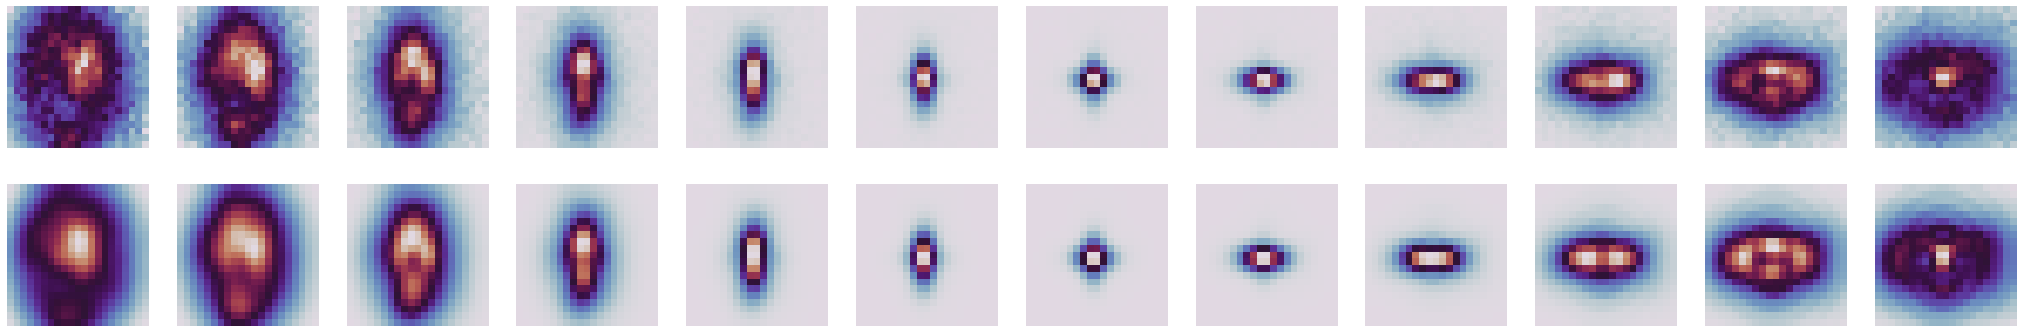

In [7]:
showpsfvsdata(f,p,index=0)

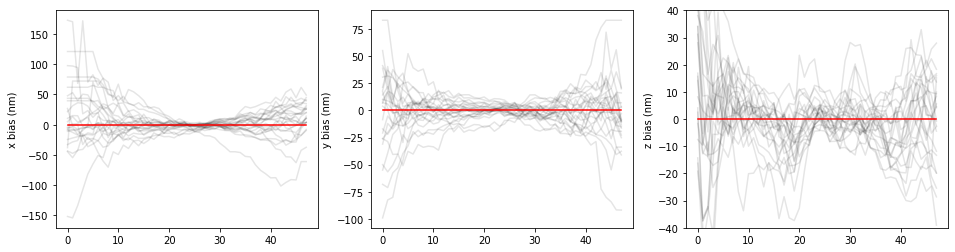

In [8]:
showlocalization(f,p)

##### Optional plots

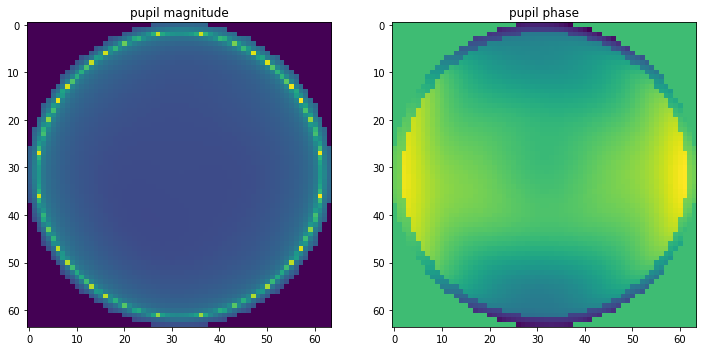

In [9]:
showpupil(f,p)

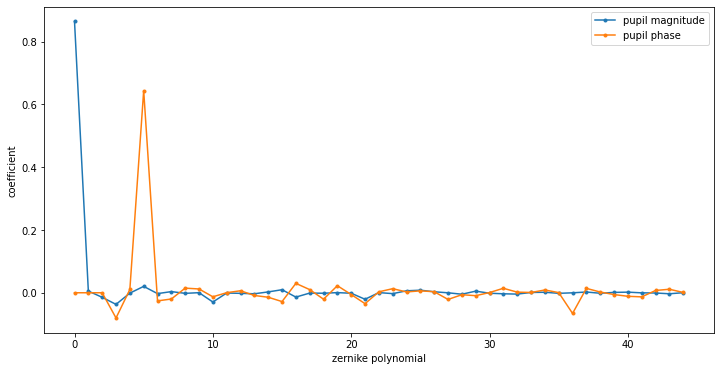

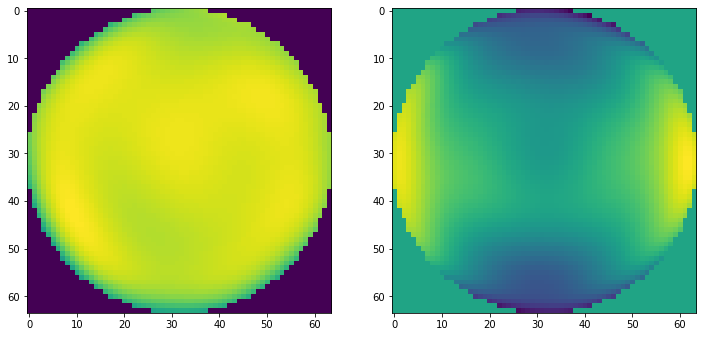

In [10]:
showzernike(f,p)

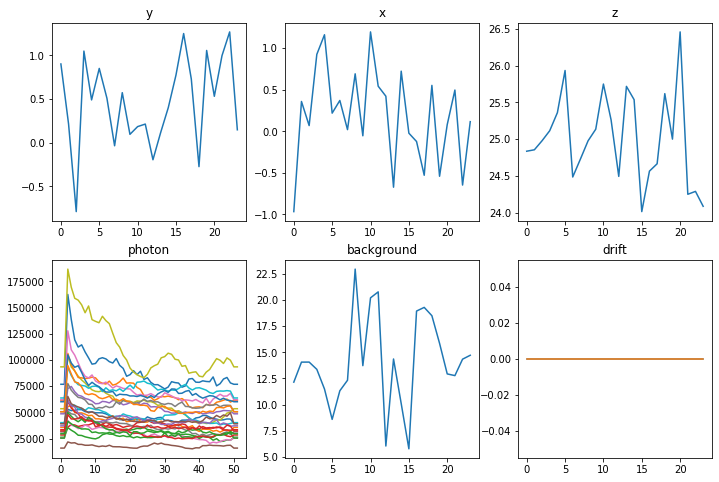

In [11]:
showlearnedparam(f,p)